# Taco Burrito EDA (updated locations)

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
pd.options.display.max_colwidth = 100

In [2]:
pd.options.display.max_rows = 500

In [3]:
data = pd.read_csv('datathon_gs_restaurant_taco.csv')
data.head().transpose()

,0,1,2,3,4
id,AVwc--MdIN2L1WUfq_6L,AVwc-2isIN2L1WUfq-o2,AVwc-2tY_7pvs4fz1A34,AVwc-2xYByjofQCxkReD,AVwc-4A3IN2L1WUfq-5n
address,2300 Ponce de Leon Blvd,5800 Broadway,3369 Rosecrans St,6955 S York St,175 Brompton Rd
categories,"French Restaurant,Bakery,French Restaurant and Bakery",Restaurant,Mexican Restaurant,American Restaurant,American Restaurant
city,Miami,San Antonio,San Diego,Littleton,Tonawanda
country,US,US,US,US,US
cuisines,NaN,Mexican,NaN,NaN,NaN
dateAdded,2015-10-23T03:09:28Z,2016-08-02T18:33:04Z,2016-03-24T10:22:32Z,2016-04-20T11:45:58Z,2015-10-19T17:19:27Z
dateUpdated,2017-07-06T02:28:36Z,2016-08-22T11:24:03Z,2017-07-06T02:49:25Z,2017-02-13T00:06:32Z,2017-07-03T18:53:28Z
keys,us/fl/miami/2300poncedeleonblvd/-1253675869,us/tx/sanantonio/5800broadway/-938675622,us/ca/sandiego/3369rosecransst/-1322134216,us/co/littleton/6955syorkst/2049275681,us/ny/tonawanda/175bromptonrd/1521050433
latitude,25.7513,29.4799,NaN,NaN,NaN


In [4]:
shop_loc = data[['id', 'name', 'real_state', 'city', 'address', 'postalCode', 'real_latitude', 'real_longitude']]
shop_loc.head().transpose()

,0,1,2,3,4
id,AVwc--MdIN2L1WUfq_6L,AVwc-2isIN2L1WUfq-o2,AVwc-2tY_7pvs4fz1A34,AVwc-2xYByjofQCxkReD,AVwc-4A3IN2L1WUfq-5n
name,La Provence French Bakery,Paloma Blanca Mexican Cuisine,Baja Fresh,Ivy At The Glenn,The Grill @ the Dome
real_state,FL,TX,CA,CO,NY
city,Miami,San Antonio,San Diego,Littleton,Tonawanda
address,2300 Ponce de Leon Blvd,5800 Broadway,3369 Rosecrans St,6955 S York St,175 Brompton Rd
postalCode,33134,78209,92110,80122,14150
real_latitude,25.7556,29.4881,32.7621,39.5821,43.0014
real_longitude,-80.2664,-98.4583,-117.202,-104.957,-78.8628


In [5]:
stat_pct = (shop_loc.groupby('real_state')['id'].count() / shop_loc.shape[0] * 100).reset_index()
pd.concat([stat_pct.sort_values(by='id', ascending=False).head(5),
 stat_pct.sort_values(by='id', ascending=False).tail(15)])

,real_state,id
4,CA,29.629333
44,TX,9.903130
9,FL,4.675366
34,NY,4.523257
14,IL,4.459211
2,AR,0.416300
11,HI,0.392282
40,RI,0.384277
26,MT,0.264190
25,MS,0.216156


In [6]:
stat_cnt = shop_loc.groupby('real_state')['id'].count().reset_index()
pd.concat([stat_cnt.sort_values(by='id', ascending=False).head(5),
 stat_cnt.sort_values(by='id', ascending=False).tail(15)])

,real_state,id
4,CA,3701
44,TX,1237
9,FL,584
34,NY,565
14,IL,557
2,AR,52
11,HI,49
40,RI,48
26,MT,33
25,MS,27


In [7]:
state_counts = shop_loc['real_state'].value_counts().reset_index()
state_counts.columns = ['STATE_ABBR', 'cnt_shop']
state_counts['cnt_shop'].sum()

12491

In [9]:
shapefile = os.path.expanduser('~/Documents/Client/Utils/states/states.shp')

colors = 7
cmap = 'Oranges'
title = 'How many Taco Restaurants in each state across the US'
imgfile = 'restaurant_count_taco.png'

gdf = gpd.read_file(shapefile)[['STATE_ABBR', 'geometry']]

merged = gdf.merge(state_counts)
# remove CA
# filt = (merged['STATE_ABBR'] != 'HI') & (merged['STATE_ABBR'] != 'AK')
# merged_48 = merged[filt]
# merged_48.head()

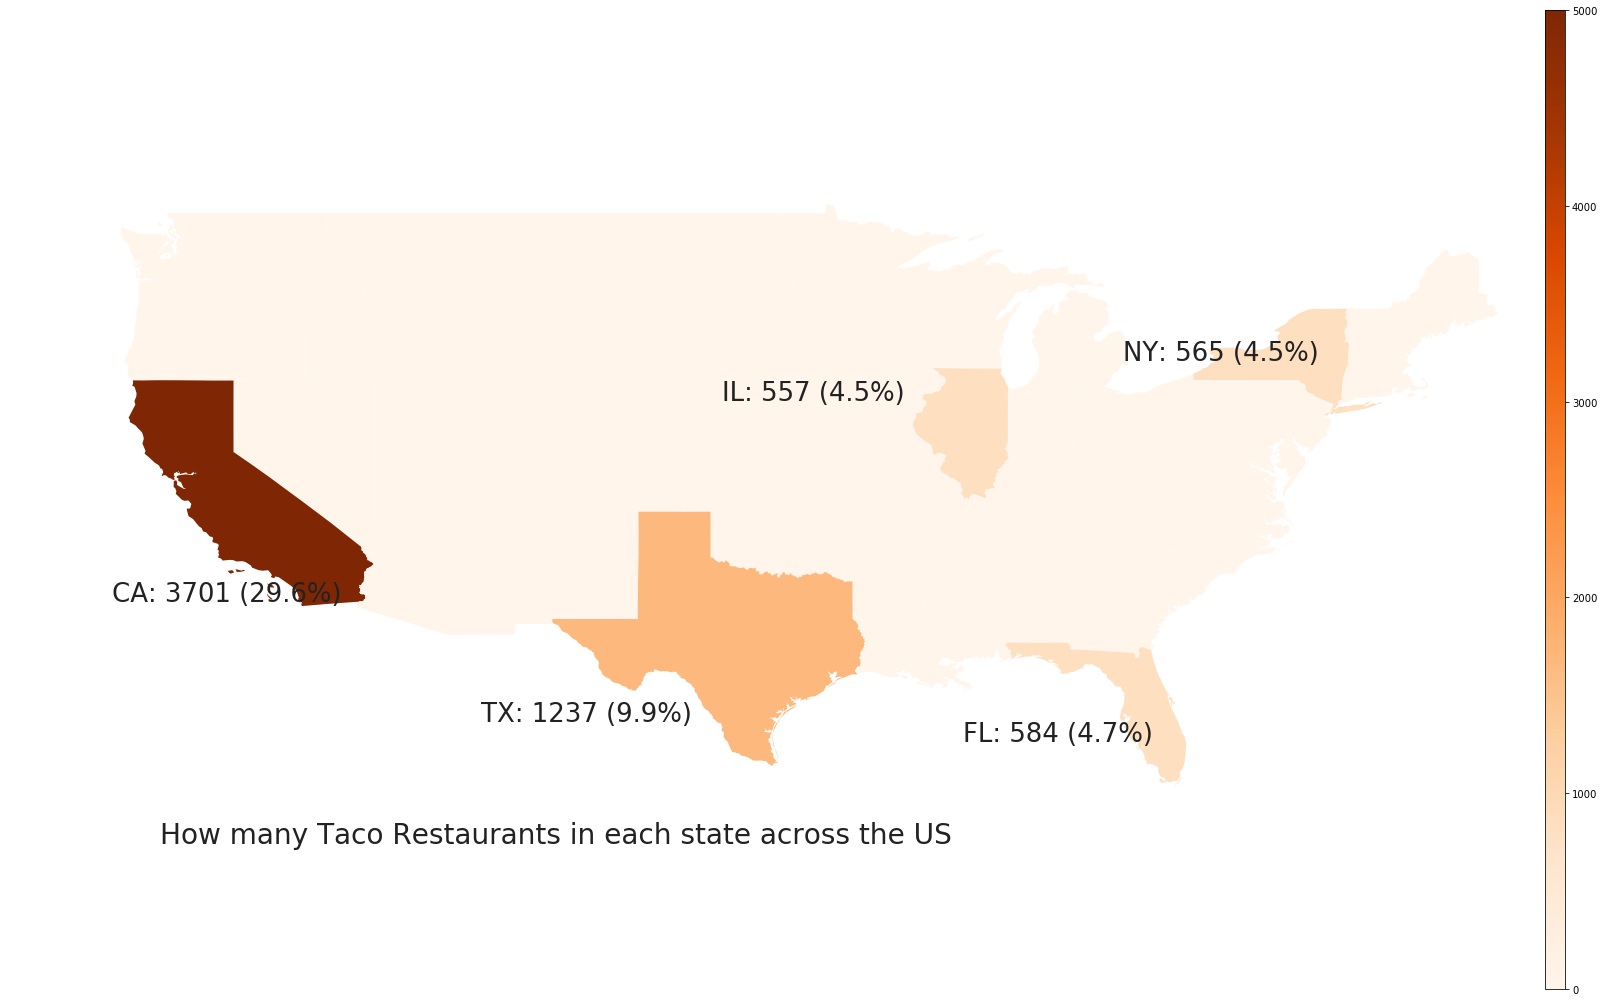

In [10]:
fig, ax = plt.subplots(1, figsize=(27, 18))
merged.plot(
    column='cnt_shop', cmap=cmap, scheme='equal_interval', ax=ax, k=colors, legend=False
)
ax.set_xlim([-125, -65])
ax.set_ylim([24, 50])
# for AK and HI
# ax.set_xlim([-160, -130])
# ax.set_ylim([20, 50])
ax.set_axis_off()

# ax.get_legend().set_bbox_to_anchor((.2, .4))
# ax.set_title('Physician Target Counts in the 50 US states', fontdict={'fontsize': '20', 'fontweight' : '2'})
ax.annotate(title, xy=(.1, .18),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=28, color='#222222')
ax.annotate('CA: 3701 (29.6%)', xy=(.07, .42),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=26, color='#222222')
ax.annotate('TX: 1237 (9.9%)', xy=(.3, .3),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=26, color='#222222')
ax.annotate('FL: 584 (4.7%)', xy=(.6, .28),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=26, color='#222222')
ax.annotate('NY: 565 (4.5%)', xy=(.7, .66),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=26, color='#222222')
ax.annotate('IL: 557 (4.5%)', xy=(.45, .62),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=26, color='#222222')

# Create colorbar as a legend
vmin, vmax = 0, 5000
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm, orientation='vertical', fraction=.05, pad=0, aspect=50)

# plt.show()
plt.savefig(imgfile)